## Reading and Understanding the Data

In [249]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [250]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [251]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [252]:
df.shape

(730, 16)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [254]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [255]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [256]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [257]:
# Check the head of the dataset

df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [258]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [259]:
# Encoding/mapping the season column

df.season = df.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)

In [260]:
# Encoding/mapping the month column

df.month = df.month.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}, inplace=True)

In [261]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}, inplace=True)

In [262]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.replace({1:'Pleasant',2:'Moderate',3:'Bad',4:'Severe'}, inplace=True)

In [263]:
# check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,None,0,None,0,None,1,None,14.110847,18.18125,80.5833,10.749882,985
1,None,0,None,0,None,1,None,14.902598,17.68695,69.6087,16.652113,801
2,None,0,None,0,None,1,None,8.050924,9.47025,43.7273,16.636703,1349
3,None,0,None,0,None,1,None,8.200000,10.60610,59.0435,10.739832,1562
4,None,0,None,0,None,1,None,9.305237,11.46350,43.6957,12.522300,1600


## Visualising the Data

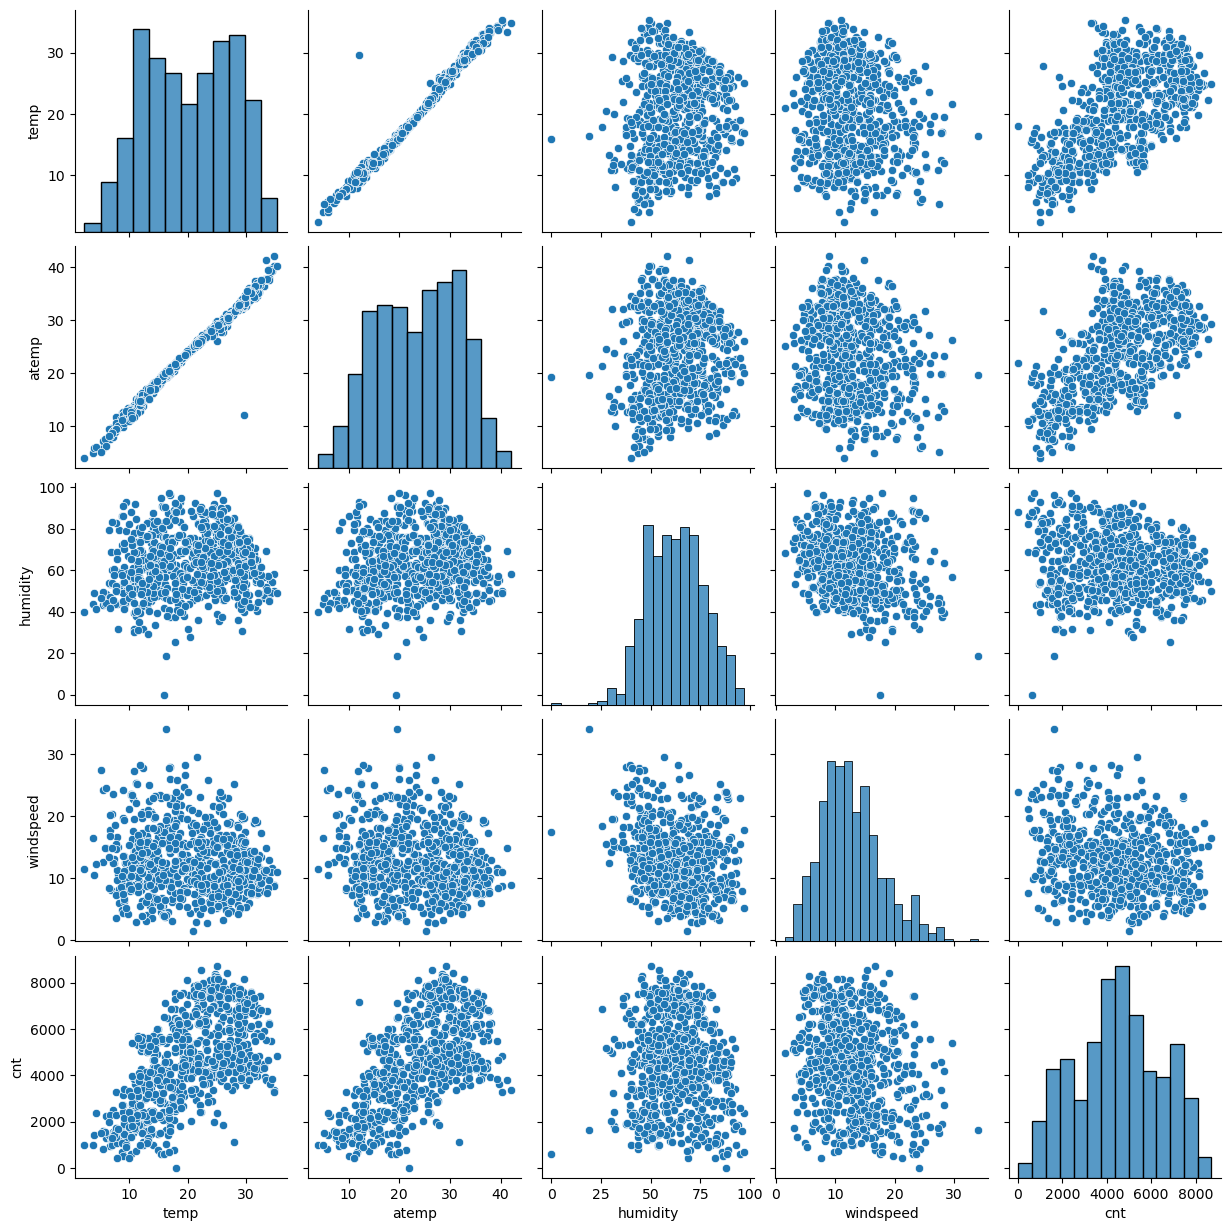

In [264]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

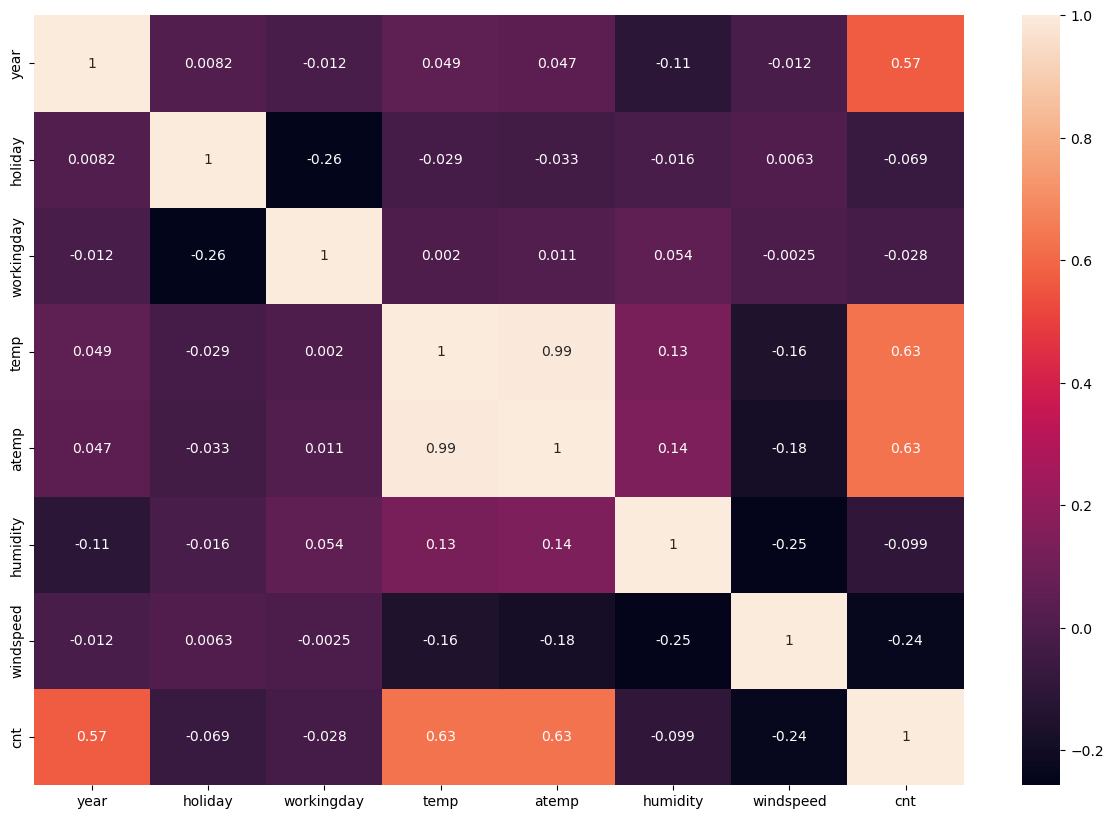

In [265]:
#Calculating Correlation
bike_corr = df.corr()
plt.figure(figsize=(15,10))

#Drawing Heatmap of correlation
sns.heatmap(bike_corr,annot=True, )
plt.show()

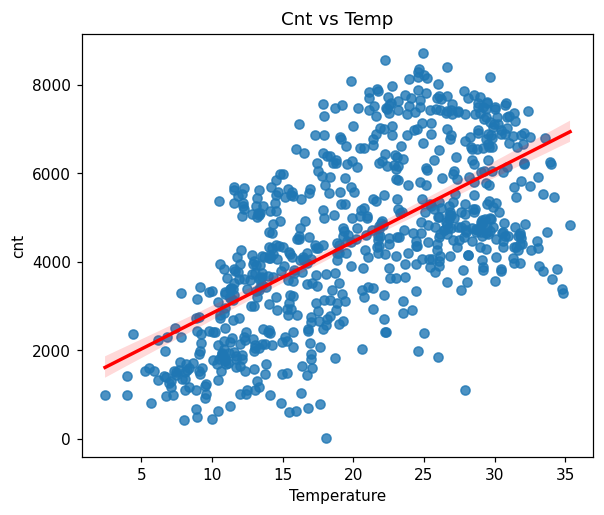

In [266]:
# Checking with regplot the correlation of cnt vs temp
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=12)
sns.regplot(data=df,y="cnt",x="temp",line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.show()

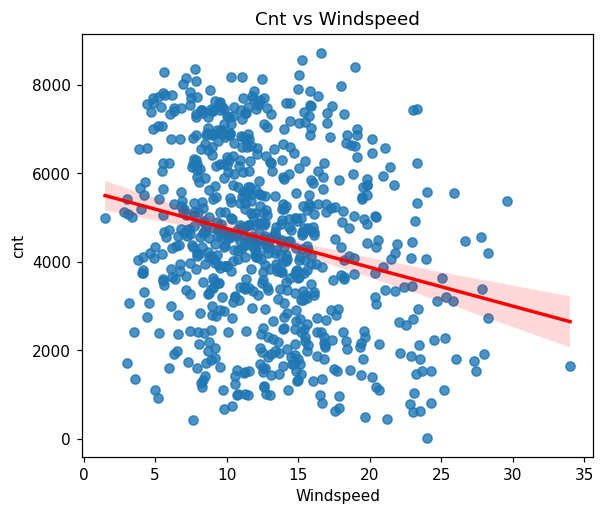

In [267]:
# Checking with regplot the correlation of cnt vs windspeed
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=12)
sns.regplot(data=df,y="cnt",x="windspeed",line_kws={"color": "red"})
plt.xlabel("Windspeed")
plt.show()


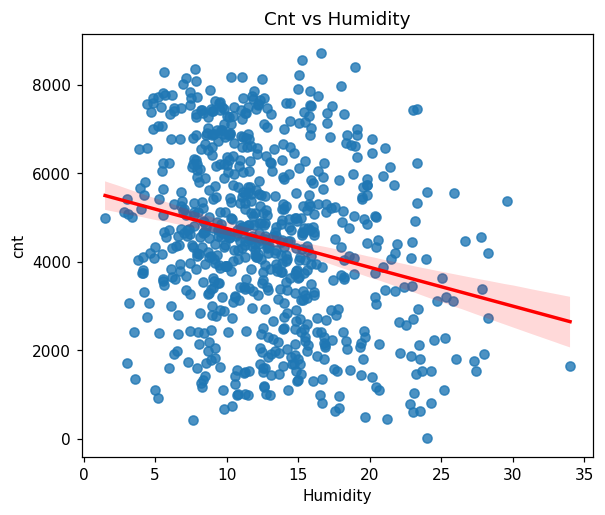

In [268]:
# Checking with regplot the correlation of cnt vs humidity
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Humidity",fontsize=12)
sns.regplot(data=df,y="cnt",x="windspeed",line_kws={"color": "red"})
plt.xlabel("Humidity")
plt.show()


## Creating Dummy Variables

In [269]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,None,0,None,0,None,1,None,14.110847,18.18125,80.5833,10.749882,985
1,None,0,None,0,None,1,None,14.902598,17.68695,69.6087,16.652113,801
2,None,0,None,0,None,1,None,8.050924,9.47025,43.7273,16.636703,1349
3,None,0,None,0,None,1,None,8.200000,10.60610,59.0435,10.739832,1562
4,None,0,None,0,None,1,None,9.305237,11.46350,43.6957,12.522300,1600


In [270]:
# Get the dummy variables for the feature season, month, weathersit and weekday

df = pd.get_dummies(data=df,columns=["season","month","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [271]:
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [272]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [273]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Moderate,Pleasant,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,1,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,1,0,0


In [274]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   aug         730 non-null    uint8  
 9   dec         730 non-null    uint8  
 10  feb         730 non-null    uint8  
 11  jan         730 non-null    uint8  
 12  july        730 non-null    uint8  
 13  june        730 non-null    uint8  
 14  mar         730 non-null    uint8  
 15  may         730 non-null    uint8  
 16  nov         730 non-null    uint8  
 17  oct         730 non-null    uint8  
 18  sep         730 non-null    uint8  
 19  mon         730 non-null    u

## Splitting into train and test sets

In [275]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [276]:
df_train.shape

(510, 30)

In [277]:
df_test.shape

(220, 30)

In [278]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [279]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [280]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Moderate,Pleasant,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.345098,0.625490,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.475867,0.484471,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [281]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [282]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   humidity    510 non-null    float64
 6   windspeed   510 non-null    float64
 7   aug         510 non-null    uint8  
 8   dec         510 non-null    uint8  
 9   feb         510 non-null    uint8  
 10  jan         510 non-null    uint8  
 11  july        510 non-null    uint8  
 12  june        510 non-null    uint8  
 13  mar         510 non-null    uint8  
 14  may         510 non-null    uint8  
 15  nov         510 non-null    uint8  
 16  oct         510 non-null    uint8  
 17  sep         510 non-null    uint8  
 18  mon         510 non-null    uint8  
 19  sat         510 non-null   

In [283]:
X_train.columns


Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may',
       'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Moderate', 'Pleasant', 'spring', 'summer', 'winter'],
      dtype='object')

In [284]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Assuming you have already prepared X_train and y_train data

# Step 1: Create and fit the Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Step 2: Create the RFE object and fit it to the data
rfe = RFE(estimator=lm, n_features_to_select=15)  # Using keyword arguments
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [285]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Moderate', True, 1),
 ('Pleasant', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [286]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Moderate', 'Pleasant', 'spring', 'summer',
       'winter'],
      dtype='object')


In [287]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [288]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [289]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [290]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,26.33
2,temp,25.12
11,Pleasant,15.65
10,Moderate,9.30
12,spring,5.75
4,windspeed,4.67
14,winter,4.53
13,summer,3.30
0,year,2.10
8,nov,1.91


## Building Model-1

In [291]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          8.15e-189
Time:                        15:41:31   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0732      0.048      1.540      0.1

In [292]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
10,Pleasant,15.65
2,temp,14.02
9,Moderate,8.82
3,windspeed,4.66
11,spring,4.41
13,winter,3.36
12,summer,2.78
0,year,2.08
7,nov,1.89
5,jan,1.74


In [293]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          4.75e-186
Time:                        15:41:31   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0467      0.039     -1.194      0.2

In [294]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['Pleasant'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.60
10,spring,2.89
12,winter,2.89
11,summer,2.24
0,year,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
9,Moderate,1.54


In [295]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.7
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          1.75e-160
Time:                        15:41:31   Log-Likelihood:                 441.27
No. Observations:                 510   AIC:                            -854.5
Df Residuals:                     496   BIC:                            -795.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2182      0.036      6.008      0.0

In [296]:
# As December shows high p-values hence we can drop it
X_train_new = X_train_new.drop(['dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.15
3,windspeed,4.60
9,spring,2.76
11,winter,2.25
10,summer,2.24
0,year,2.07
4,jan,1.61
5,july,1.59
6,nov,1.59
8,Moderate,1.54


In [297]:
# Building 4th linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     158.6
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          3.05e-161
Time:                        15:41:31   Log-Likelihood:                 440.43
No. Observations:                 510   AIC:                            -854.9
Df Residuals:                     497   BIC:                            -799.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2039      0.035      5.898      0.0

In [298]:
# As November shows high p-values hence we can drop it
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.56
8,spring,2.75
9,summer,2.24
0,year,2.07
10,winter,1.76
4,jan,1.61
5,july,1.59
7,Moderate,1.54
6,sep,1.33


In [299]:
# Building 5th linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.2
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          2.65e-162
Time:                        15:41:31   Log-Likelihood:                 440.27
No. Observations:                 510   AIC:                            -856.5
Df Residuals:                     498   BIC:                            -805.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2010      0.034      5.882      0.0

In [300]:
# As Jamuary shows high p-values hence we can drop it
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.54
8,summer,2.23
7,spring,2.08
0,year,2.06
9,winter,1.75
4,july,1.58
6,Moderate,1.53
5,sep,1.33
1,holiday,1.04


In [301]:
# Building 6th linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          7.37e-163
Time:                        15:41:31   Log-Likelihood:                 438.86
No. Observations:                 510   AIC:                            -855.7
Df Residuals:                     499   BIC:                            -809.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1871      0.033      5.638      0.0

In [302]:
# Checking the parameters and their coefficient values
lr_3.params

const        0.187138
year         0.238997
holiday     -0.083976
temp         0.503200
windspeed   -0.177142
july        -0.054642
sep          0.067343
Moderate    -0.066863
spring      -0.059965
summer       0.049417
winter       0.071807
dtype: float64

## Residual Analysis

In [303]:
X_train_lm_3

,const,year,holiday,temp,windspeed,july,sep,Moderate,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [304]:
y_train_pred = lr_3.predict(X_train_lm_3)

## Error Terms

Text(0.5, 0, 'Errors')

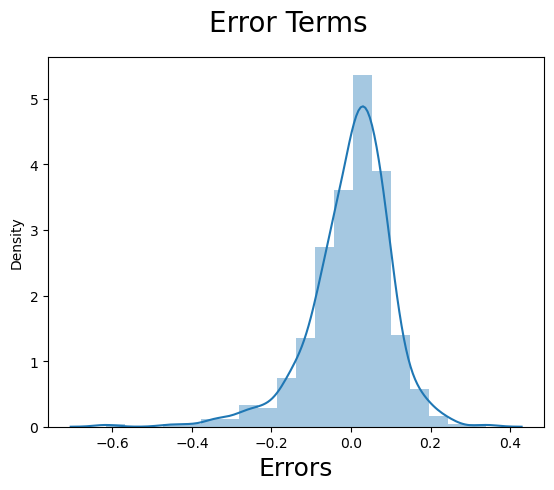

In [305]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

## Making Predictions

In [306]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Moderate,Pleasant,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,1,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,1,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,1,0,1,0


In [307]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Moderate,Pleasant,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.318182,0.654545,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.466833,0.476601,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [308]:
y_test = df_test.pop('cnt')
X_test = df_test

In [309]:
col1 = X_train_new.columns

X_test = X_test[col1]



In [311]:
# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)
X_test_lm_6

,const,year,holiday,temp,windspeed,july,sep,Moderate,spring,summer,winter
184,1.0,0,1,0.831783,0.084219,1,0,1,0,0,0
535,1.0,1,0,0.901354,0.153728,0,0,0,0,1,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,0.519232,0.283397,0,0,0,0,0,1
127,1.0,0,0,0.584649,0.069510,0,0,0,0,1,0
640,1.0,1,0,0.745598,0.052115,0,0,1,0,0,1
72,1.0,0,0,0.331557,0.203418,0,0,0,1,0,0


In [312]:
y_pred = lr_3.predict(X_test_lm_6)

In [313]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7778

## Model Evaluation

Text(0, 0.5, 'y_pred')

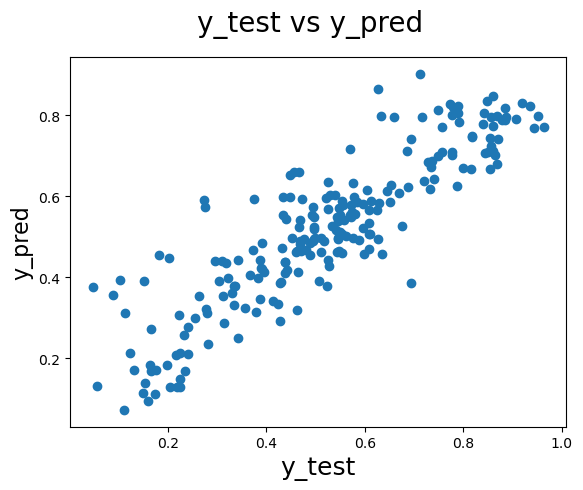

In [314]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [315]:
round(lr_3.params,4)

const        0.1871
year         0.2390
holiday     -0.0840
temp         0.5032
windspeed   -0.1771
july        -0.0546
sep          0.0673
Moderate    -0.0669
spring      -0.0600
summer       0.0494
winter       0.0718
dtype: float64

In [316]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7671


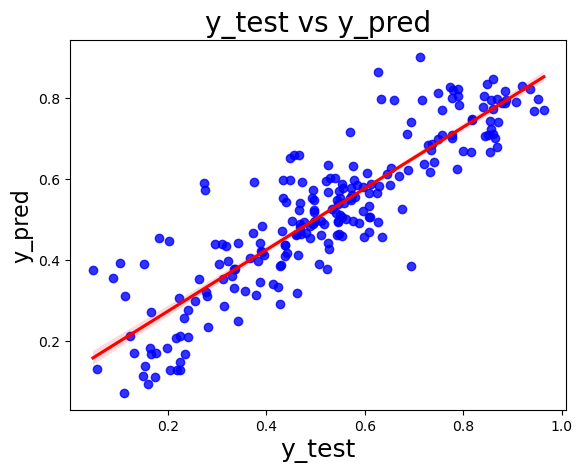

In [317]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


## Comparision between Training and Testing dataset:
## - Train dataset R^2          : 0.833
## - Test dataset R^2           : 0.8038
## - Train dataset Adjusted R^2 : 0.829    
## - Test dataset Adjusted R^2  : 0.7944

## Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.